In [560]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
numpy.random.seed(10)

In [561]:
all_df = pd.read_csv("data/data2.csv")

In [562]:
all_df[:4]

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,...,Respiratory.1,Circulatory.2,Diabetes.2,Digestive.2,Genitourinary.2,Injury.2,Muscoloskeletal.2,Neoplasms.2,Others.2,Respiratory.2
0,10,3,59,0,18,0,0,0,9,0,...,0,0,0,0,0,0,0,0,1,0
1,20,2,11,5,13,2,0,1,6,0,...,0,0,0,0,0,0,0,0,1,0
2,30,2,44,1,16,0,0,0,7,0,...,0,1,0,0,0,0,0,0,0,0
3,40,1,51,0,8,0,0,0,5,0,...,0,0,1,0,0,0,0,0,0,0


In [563]:
all_df.shape

(98052, 71)

In [564]:
X=all_df.drop(['readmitted'], axis=1).values.astype('float64')

In [565]:
Y = all_df['readmitted'].values.astype('int64')

In [566]:
X.shape

(98052, 70)

In [567]:
Y[:5]

array([1, 0, 0, 0, 1])

In [568]:
 X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

78441

In [569]:
from keras.utils import np_utils
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

In [570]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [571]:
model = Sequential()

In [572]:
model.add(Dense(units=140*2,   input_dim=70,
                kernel_initializer='uniform', 
                activation='relu'))

In [573]:
model.add(Dense(units=140,
                kernel_initializer='uniform', 
                activation='relu'))

In [574]:
model.add(Dense(units=2, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [575]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 280)               19880     
_________________________________________________________________
dense_128 (Dense)            (None, 140)               39340     
_________________________________________________________________
dense_129 (Dense)            (None, 2)                 282       
Total params: 59,502
Trainable params: 59,502
Non-trainable params: 0
_________________________________________________________________


In [576]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [577]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=60, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 70596 samples, validate on 7845 samples
Epoch 1/60
70596/70596 [==============================] - 5s 78us/step - loss: 0.6643 - acc: 0.5956 - val_loss: 0.6544 - val_acc: 0.6110
Epoch 2/60
70596/70596 [==============================] - 2s 22us/step - loss: 0.6461 - acc: 0.6250 - val_loss: 0.6533 - val_acc: 0.6128
Epoch 3/60
70596/70596 [==============================] - 2s 22us/step - loss: 0.6419 - acc: 0.6293 - val_loss: 0.6566 - val_acc: 0.6148
Epoch 4/60
70596/70596 [==============================] - 1s 21us/step - loss: 0.6403 - acc: 0.6329 - val_loss: 0.6556 - val_acc: 0.6125


In [578]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

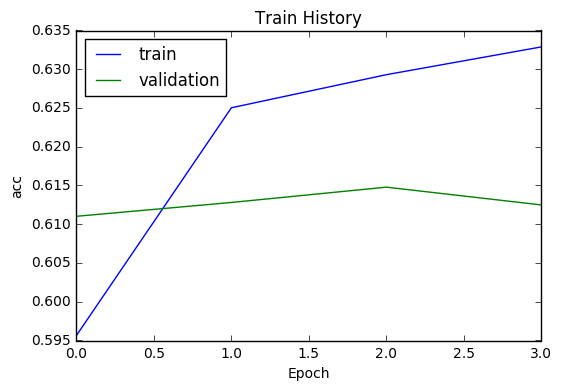

In [579]:
show_train_history(train_history,'acc','val_acc')

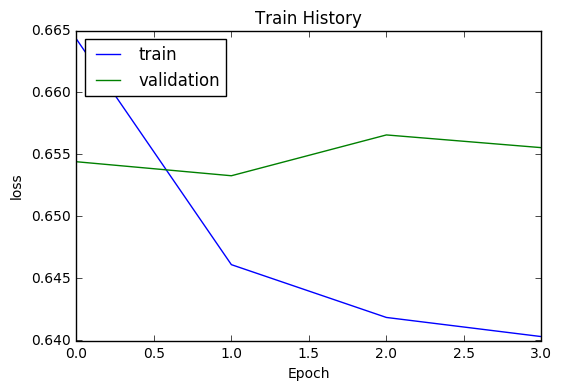

In [580]:
show_train_history(train_history,'loss','val_loss')

In [581]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

19611/19611 [==============================] - 1s 67us/step


In [582]:
scores[1]

0.6214369486877394